<a href="https://colab.research.google.com/github/isuriperera1/HopeBridge/blob/Face-Recognition/Face_Recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [1]:
!pip install tensorflow==2.15.1

In [2]:
!pip install opencv-python opencv-python-headless numpy
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.7 MB/s eta 0:00:00


In [6]:
!pip install ipywebrtc

FileUpload(value={}, accept='image/*', description='Upload')

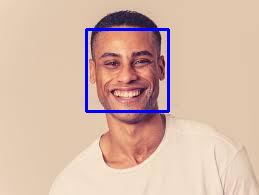

1/1 [==============================] - 0s 123ms/step


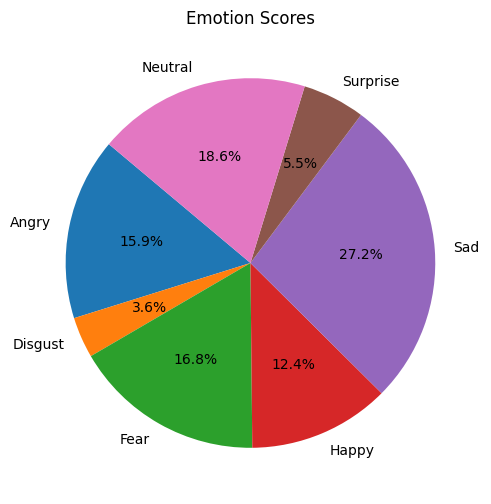

Depression Level: Moderate
No faces detected


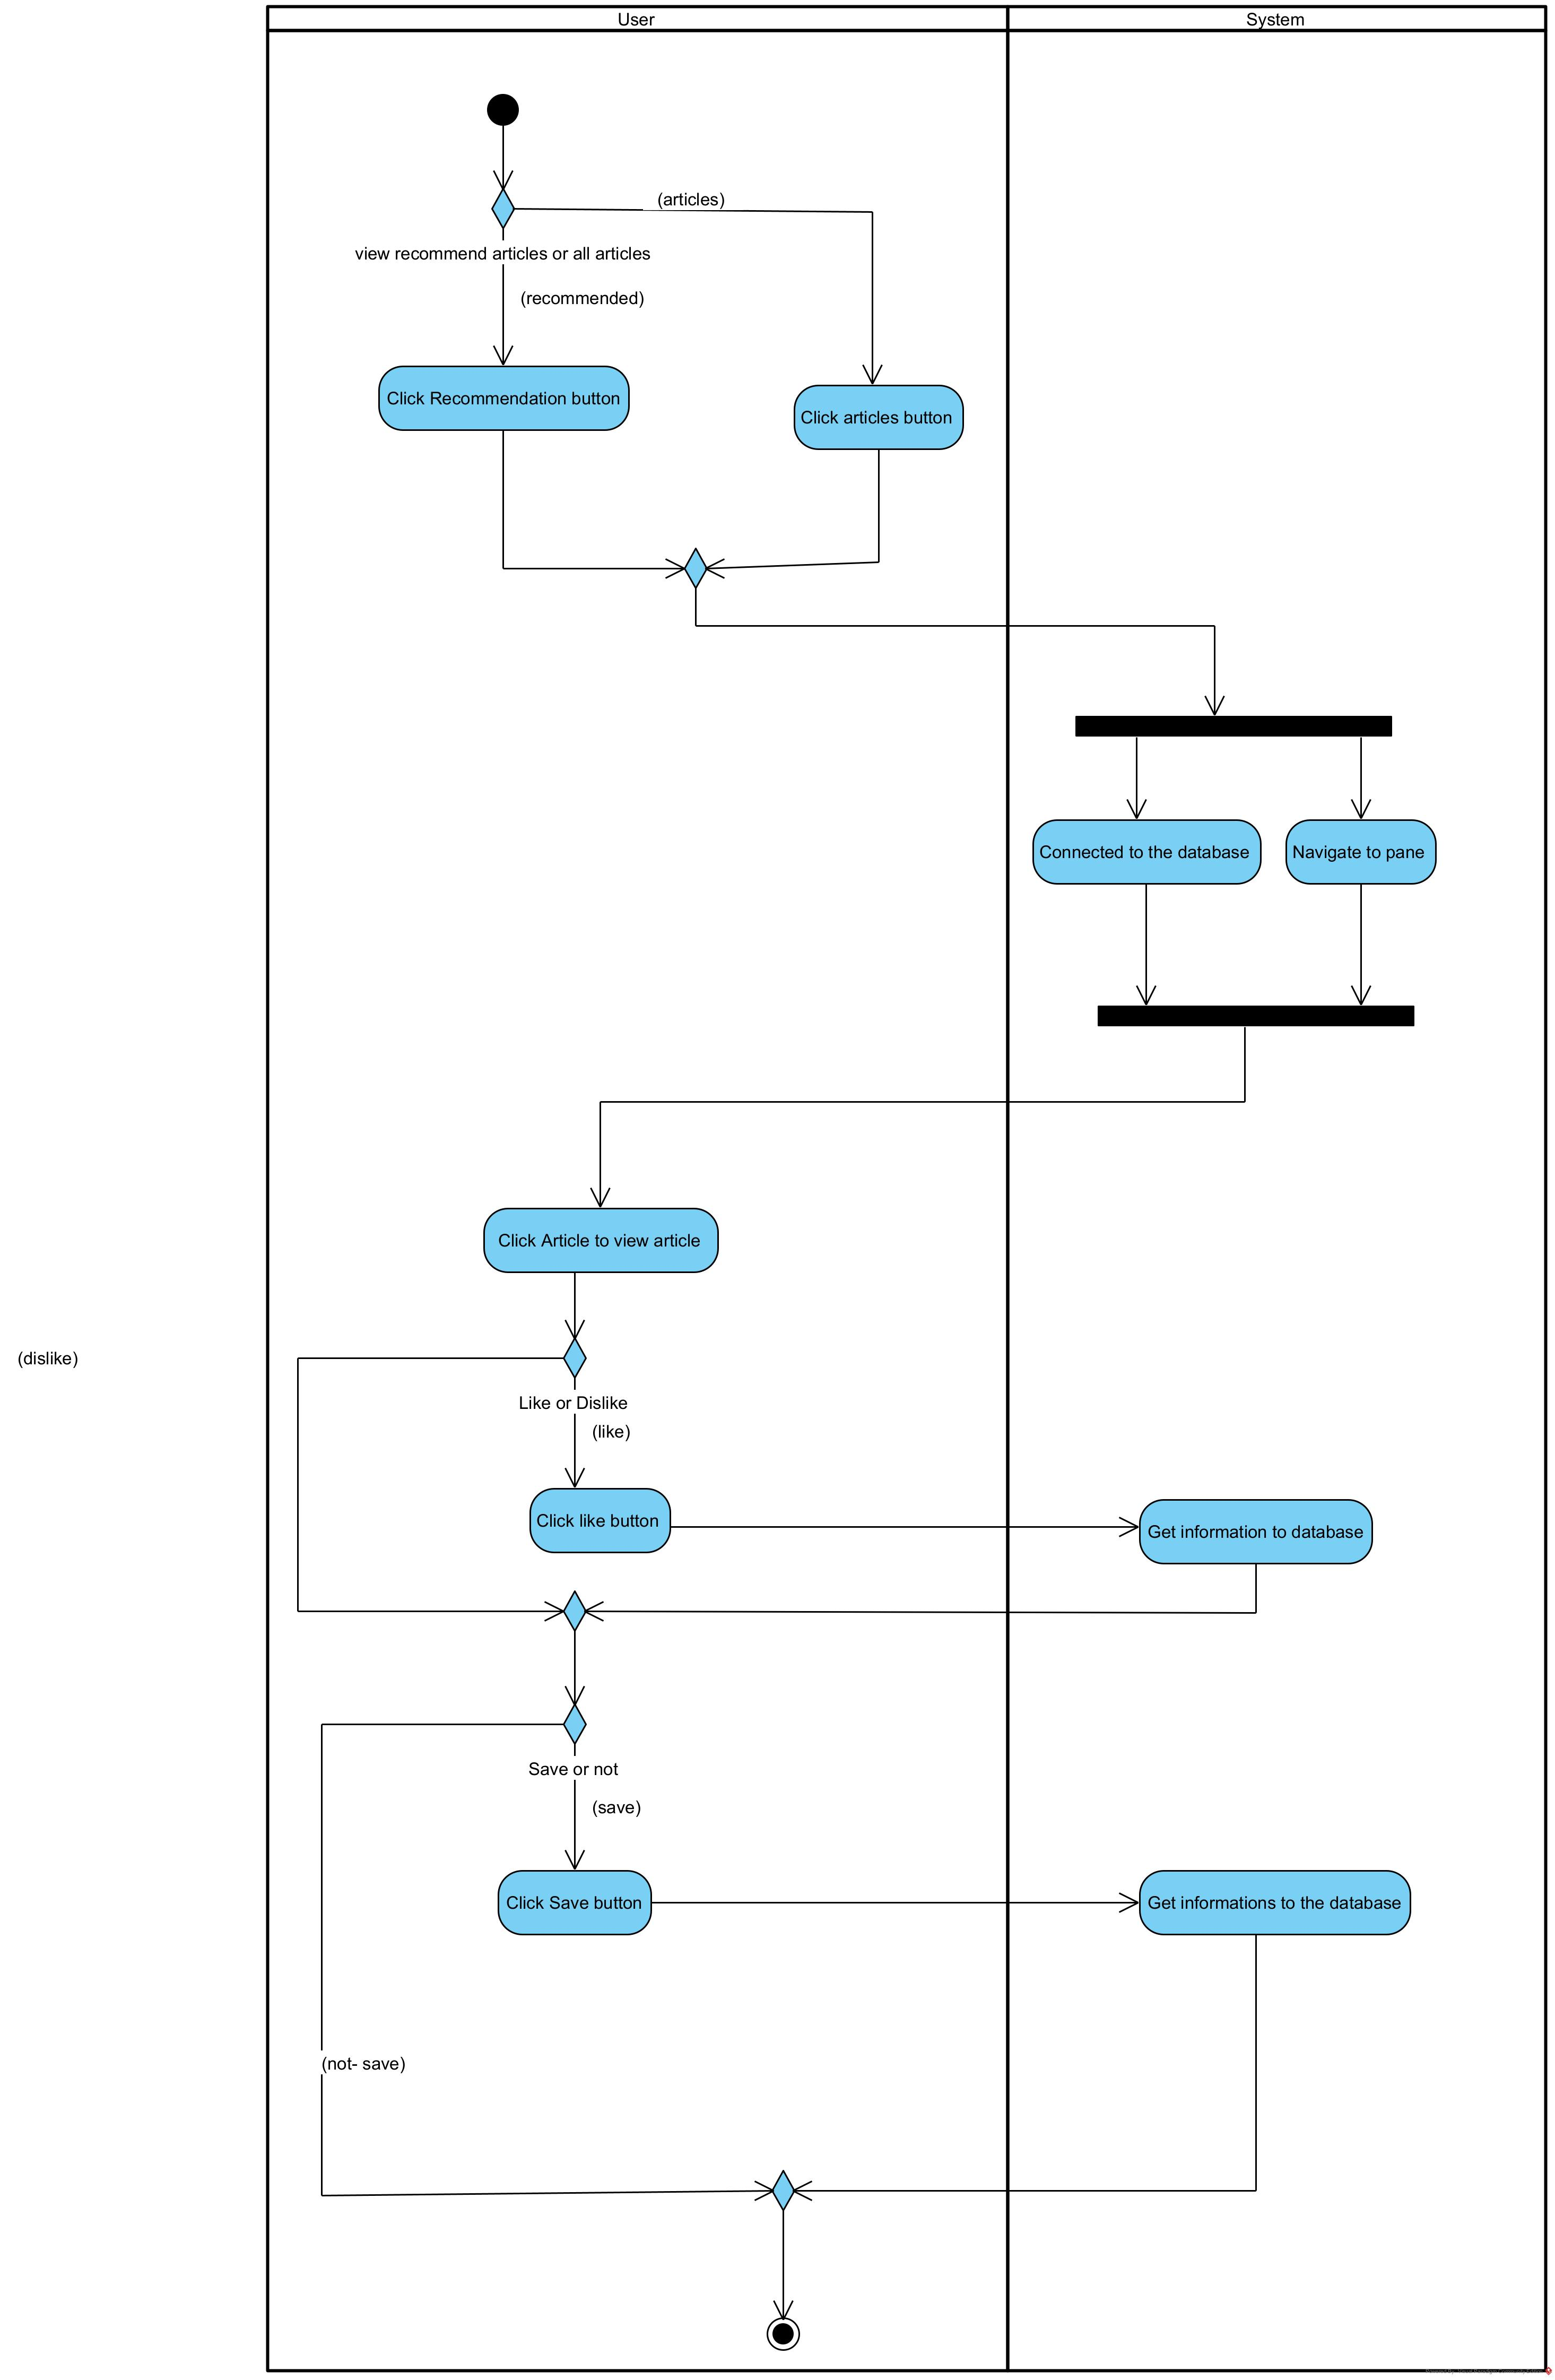

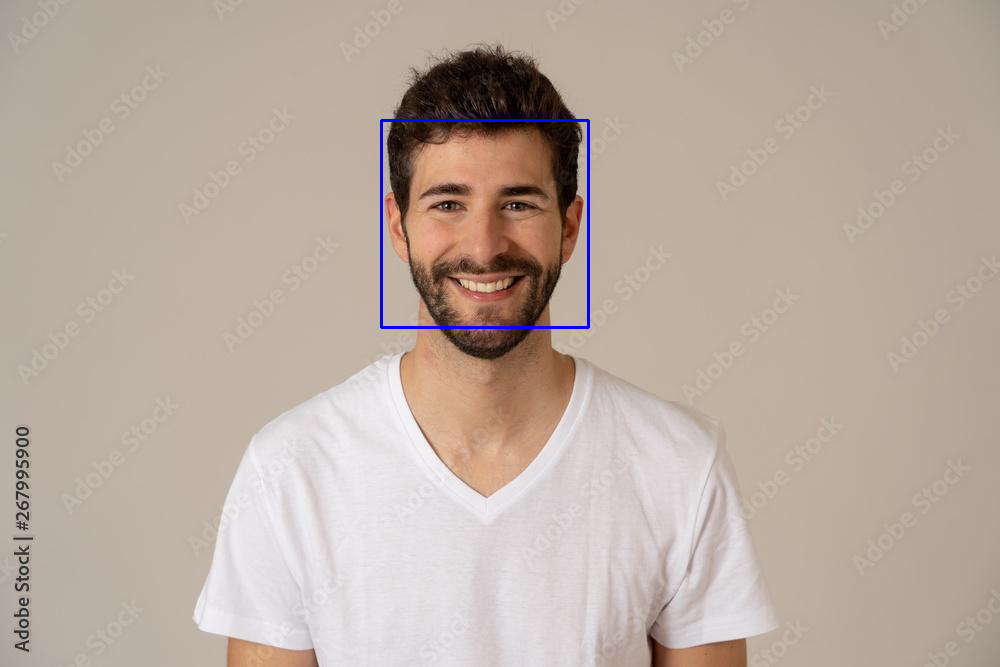

1/1 [==============================] - 0s 26ms/step


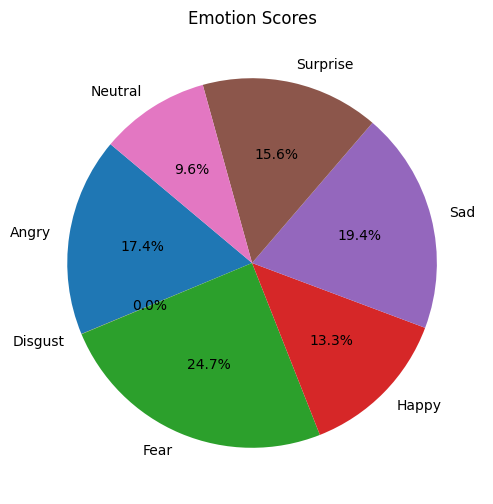

Depression Level: Low


In [7]:
import cv2
import io
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the pre-trained model for emotion detection
model_path = 'FR_Model.h5'
model = load_model(model_path)

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess image for emotion detection
def preprocess_image(image_path, target_size):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    image_array = np.expand_dims(image_array, axis=-1)
    image_array = np.expand_dims(image_array, axis=0)
    image_array /= 255.0
    return image_array

# Detect faces in the image
def detect_face(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    img = cv2.imread(image_path)

    if img is None:
        print("Error loading image")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No faces detected")
        output_path = 'output_image.jpg'
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for display
        display(Image.fromarray(img_rgb))
        return None  # Stop the process if no face is detected

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    output_path = 'output_image.jpg'
    cv2.imwrite(output_path, img)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img_rgb))

    return output_path  # Return path of the image with detected faces

# Detect depression level based on emotion scores
def detect_depression_level(emotion_scores, emotion_labels):
    negative_emotions = ['Angry', 'Disgust', 'Fear', 'Sad']
    positive_emotions = ['Happy', 'Surprise']

    negative_score = sum(emotion_scores[emotion_labels.index(e)] for e in negative_emotions)
    positive_score = sum(emotion_scores[emotion_labels.index(e)] for e in positive_emotions)
    neutral_score = emotion_scores[emotion_labels.index('Neutral')]

    depression_score = (negative_score * 0.6) + (neutral_score * 0.3) - (positive_score * 0.1)

    if depression_score < 0.4:
        return "Low"
    elif 0.4 <= depression_score < 0.7:
        return "Moderate"
    else:
        return "High"

# Handle uploaded image for both face detection and emotion detection
def handle_upload(change):
    uploaded_filename = next(iter(change['new']))
    content = change['new'][uploaded_filename]['content']

    with io.BytesIO(content) as f:
        f.seek(0)
        image = Image.open(f)
        image.save("uploaded_image.jpg")

    face_image_path = detect_face("uploaded_image.jpg")

    if face_image_path is None:
        return

    image = preprocess_image(face_image_path, target_size=(48, 48))

    predictions = model.predict(image)[0]

    plt.figure(figsize=(10, 6))
    plt.pie(predictions, labels=emotion_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
    plt.title('Emotion Scores')
    plt.show()

    depression_level = detect_depression_level(predictions, emotion_labels)
    print(f"Depression Level: {depression_level}")

# Create an upload widget
uploader = widgets.FileUpload(
    accept='image/*',
    multiple=False
)

display(uploader)
uploader.observe(handle_upload, names='value')


FileUpload(value={}, accept='image/*', description='Upload')

Button(description='Capture Photo', style=ButtonStyle())

No faces detected


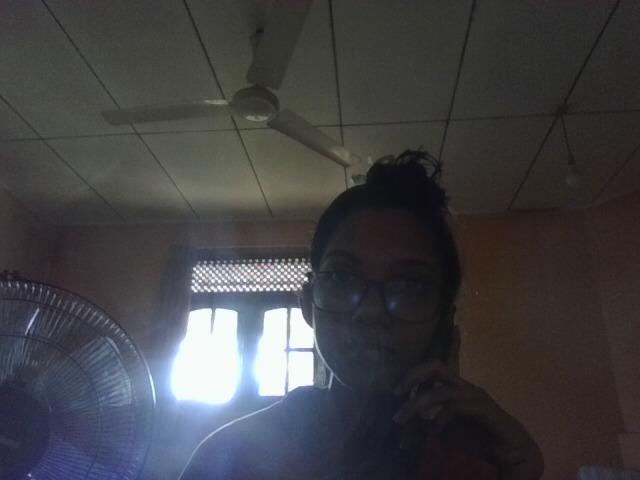

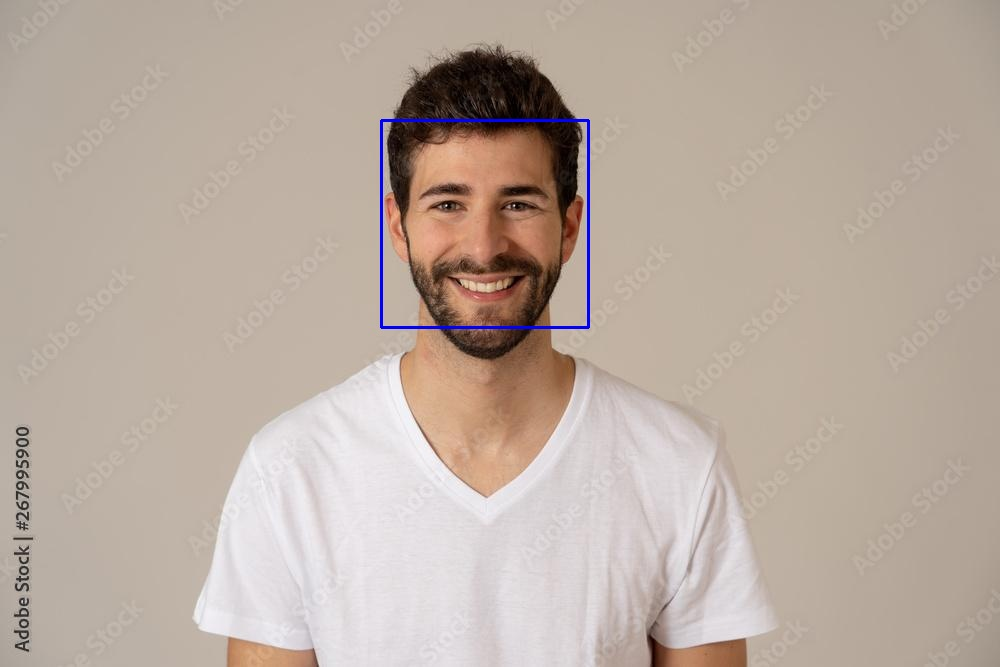

1/1 [==============================] - 0s 224ms/step


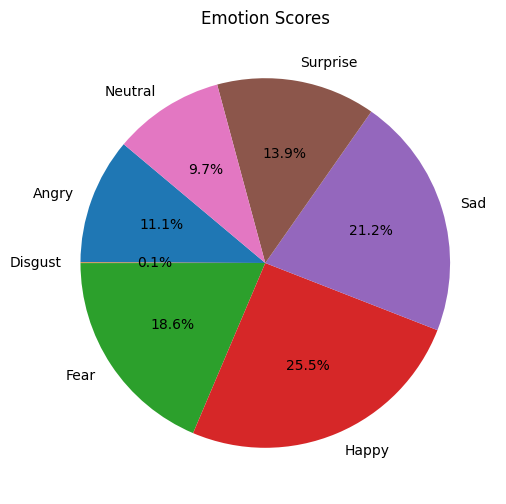

Depression Level: Low


In [9]:
import cv2
import io
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Javascript
from PIL import Image as PILImage
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import base64
import google.colab.output as colab_output
import time

# Load the pre-trained model
model_path = 'FR_Model.h5'
model = load_model(model_path)

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def preprocess_image(image, target_size):
    image = image.resize(target_size)
    image_array = img_to_array(image)
    image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    image_array = np.expand_dims(image_array, axis=-1)
    image_array = np.expand_dims(image_array, axis=0)
    image_array /= 255.0
    return image_array

def detect_face(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    img = cv2.imread(image_path)
    if img is None:
        print("Error loading image")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) == 0:
        print("No faces detected")
        display(PILImage.open(image_path))
        return None
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    output_path = 'output_image.jpg'
    cv2.imwrite(output_path, img)
    display(PILImage.open(output_path))
    return output_path

def detect_depression_level(emotion_scores):
    negative_emotions = ['Angry', 'Disgust', 'Fear', 'Sad']
    positive_emotions = ['Happy', 'Surprise']
    negative_score = sum(emotion_scores[emotion_labels.index(e)] for e in negative_emotions)
    positive_score = sum(emotion_scores[emotion_labels.index(e)] for e in positive_emotions)
    neutral_score = emotion_scores[emotion_labels.index('Neutral')]
    depression_score = (negative_score * 0.6) + (neutral_score * 0.3) - (positive_score * 0.1)
    return "Low" if depression_score < 0.4 else "Moderate" if depression_score < 0.7 else "High"

def process_image(image):
    image = image.convert('RGB')
    image.save("uploaded_image.jpg")
    face_image_path = detect_face("uploaded_image.jpg")
    if face_image_path is None:
        return
    image = preprocess_image(PILImage.open(face_image_path), target_size=(48, 48))
    predictions = model.predict(image)[0]
    plt.figure(figsize=(10, 6))
    plt.pie(predictions, labels=emotion_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
    plt.title('Emotion Scores')
    plt.show()
    print(f"Depression Level: {detect_depression_level(predictions)}")

def handle_upload(change):
    uploaded_filename = next(iter(change['new']))
    content = change['new'][uploaded_filename]['content']
    image = PILImage.open(io.BytesIO(content))
    process_image(image)

def take_photo():
    js = '''
        async function captureImage() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await new Promise(resolve => video.onloadedmetadata = resolve);
            video.play();
            await new Promise(resolve => setTimeout(resolve, 500));
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0, canvas.width, canvas.height);
            stream.getTracks().forEach(track => track.stop());
            return canvas.toDataURL('image/jpeg');
        }
        captureImage();
    '''
    data_url = colab_output.eval_js(js)
    image_data = base64.b64decode(data_url.split(',')[1])
    with open("captured_image.jpg", "wb") as f:
        f.write(image_data)
    image = PILImage.open("captured_image.jpg")
    process_image(image)

# Widgets
uploader = widgets.FileUpload(accept='image/*', multiple=False)
camera_button = widgets.Button(description="Capture Photo")
camera_button.on_click(lambda _: take_photo())

display(uploader, camera_button)
uploader.observe(handle_upload, names='value')
